In [21]:
import biosonic
print(biosonic.__file__)

/Users/lenagies/Desktop/Master/Nebenjob/biosonic/src/biosonic/__init__.py


In [22]:
import numpy as np
from scipy.signal import chirp
import matplotlib.pyplot as plt
from biosonic.plot import plot_filterbank_and_cepstrum, plot_spectrogram, plot_cepstrum, plot_cepstral_coefficients
from biosonic.filter import mel_filterbank, log_filterbank
from biosonic.compute.spectrotemporal import cepstral_coefficients, spectrogram, cepstrum
from biosonic.handle import read_wav

In [23]:
n_filters = 20
n_fft = 1024
n_ceps = 32

f1 = 200
f2 = 5000
duration = 1
sr = 16000
time = np.linspace(0, duration, int(sr * duration), endpoint=False)
x = chirp(time, f1, 1, f2, method='hyperbolic')# + np.random.normal(0, .5, size=time.shape)

In [24]:
from biosonic.compute.utils import hz_to_mel

hz_to_mel(200)

np.float64(652.1609413889511)

0.0 7479.923826452316
[119.15810817 141.98654744 169.18848379 201.60179653 240.2248868 ]
119.15810817484848 6713.768892890679


<Axes: title={'center': 'Spectrogram'}, xlabel='Time (s)', ylabel='Frequency (Hz)'>

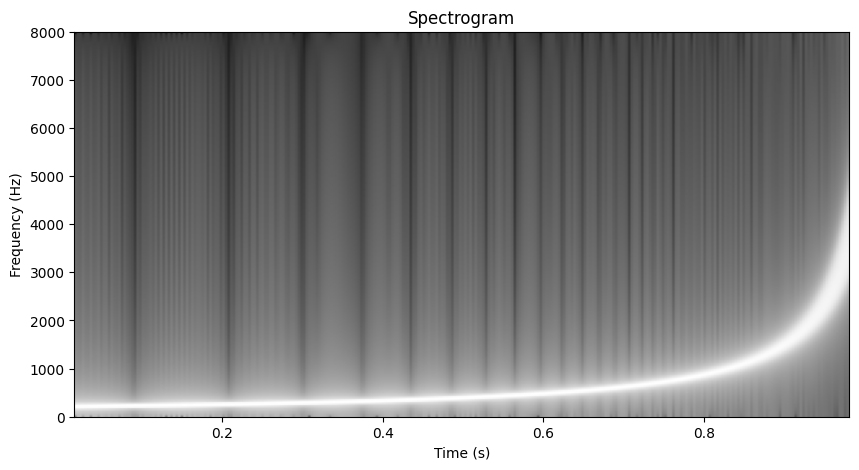

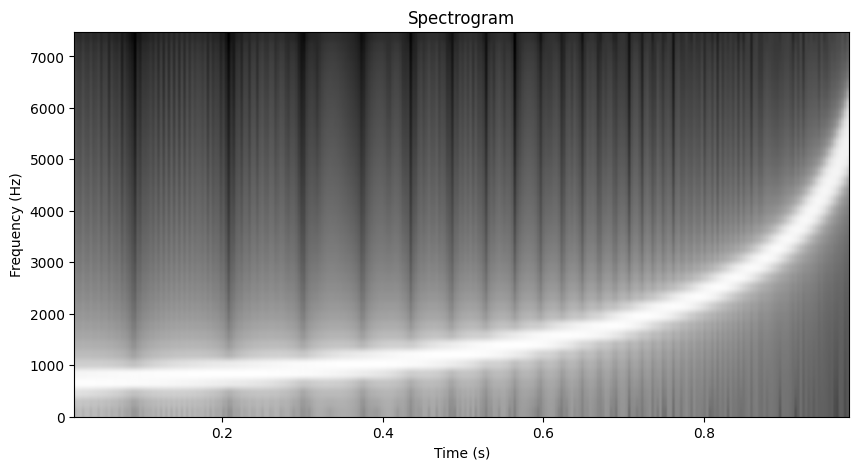

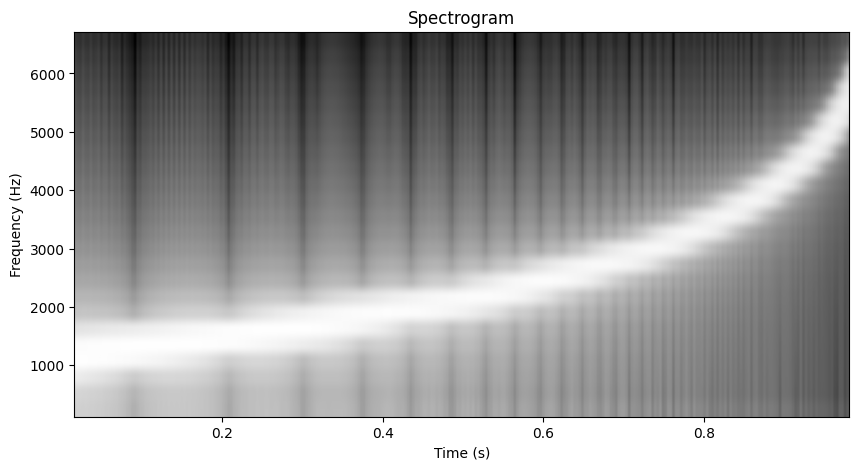

In [25]:
plot_spectrogram(x, sr=sr, window='hann', window_length=512, overlap=90, cmap='grey')
plot_spectrogram(x, sr=sr, window='hann', window_length=512, overlap=90, cmap='grey', freq_scale="mel")
plot_spectrogram(x, sr=sr, window='hann', window_length=512, overlap=90, cmap='grey', freq_scale="log", flim=(100, 8000), n_bands=24)

In [26]:
plot_cepstral_coefficients(x, sr, n_fft, n_filters=50)

(513, 101)
(101, 1024)
(101, 513)
(40, 101)


In [27]:
signal_ = read_wav("/Users/lenagies/Desktop/Master/Thesis/geese/data/GT00742_10_Boris_contact.wav")
print(signal_)

Signal(data=array([-0.00012207, -0.00094607, -0.001648  , ..., -0.00701926,
       -0.00747703, -0.00817896], shape=(5771,), dtype=float32), n_channels=1, sr=44100, quantization='float32')


0.0 20195.458359101107
[240.45288692 289.08795415 347.56016575 417.85922617 502.3772863 ]
240.4528869234825 16635.275422053415


<Axes: title={'center': 'Spectrogram'}, xlabel='Time (s)', ylabel='Frequency (Hz)'>

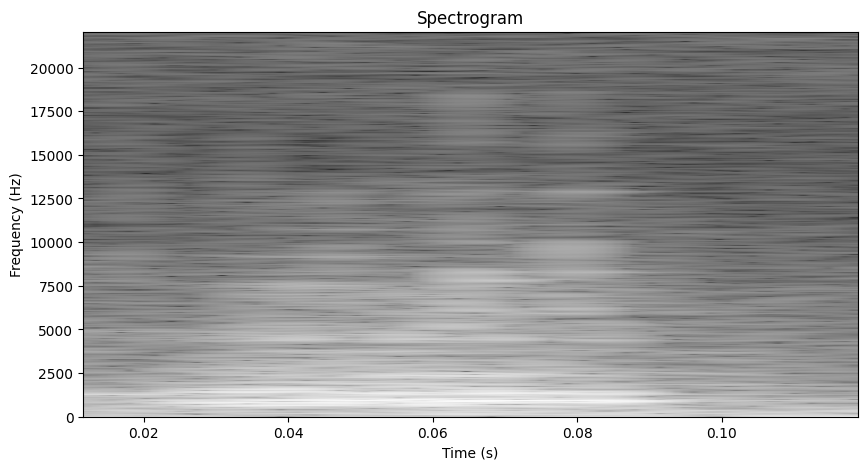

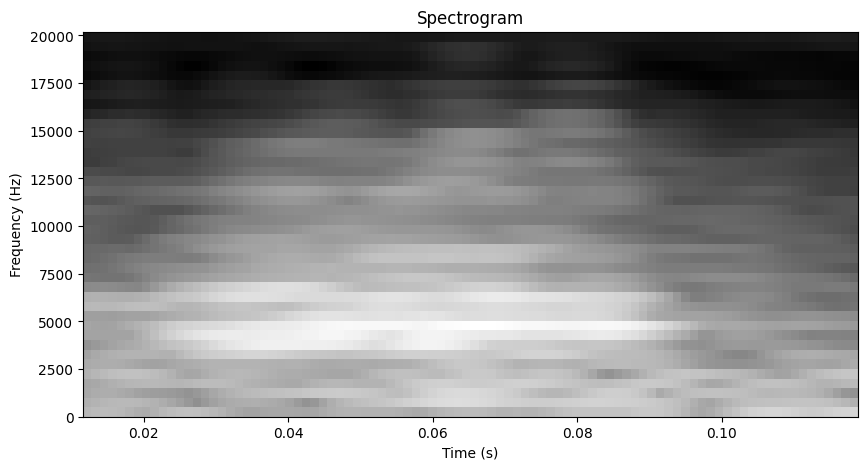

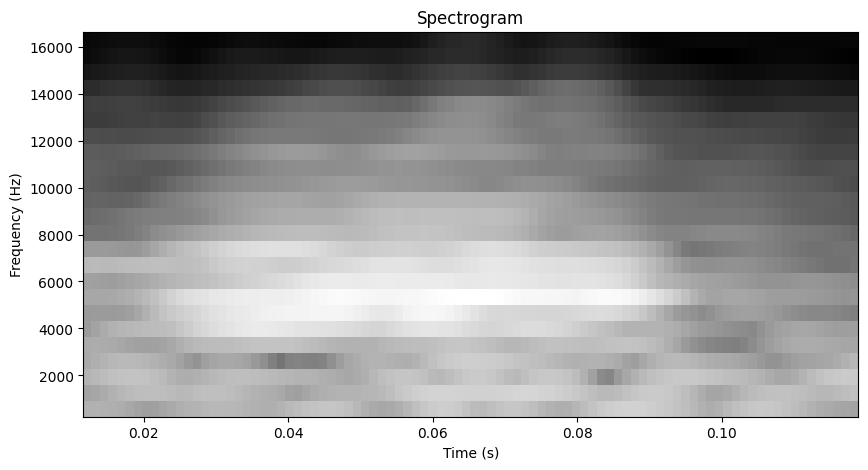

In [28]:
plot_spectrogram(signal_.data, sr=signal_.sr, window='hann', window_length=n_fft, overlap=95, cmap='grey')
plot_spectrogram(signal_.data, sr=signal_.sr, window='hann', window_length=n_fft, overlap=95, cmap='grey', freq_scale="mel")
plot_spectrogram(signal_.data, sr=signal_.sr, window='hann', window_length=n_fft, overlap=95, cmap='grey', freq_scale="log", flim=(200, 20000), n_bands = 24)

In [29]:
plot_cepstral_coefficients(signal_.data, signal_.sr, n_fft)

(513, 14)
(14, 1024)
(14, 513)
(32, 14)


[3.9635162e+01 5.4068103e+00 5.8359408e-01 ... 3.7286179e-03 5.8359408e-01
 5.4068103e+00]


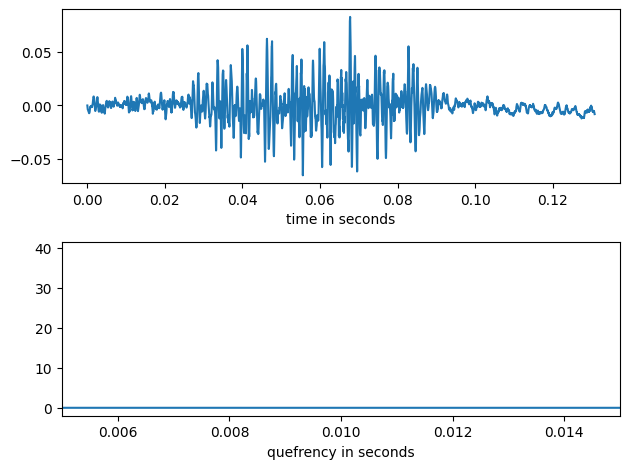

In [30]:
ceps, _ = cepstrum(signal_.data, signal_.sr)
print(ceps)
plot_cepstrum(signal_.data, signal_.sr)

In [31]:
# fbanks, _ = mel_filterbank(10, n_fft, sr)
# ceps = cepstrum(x, sr)
# plot_cepstral_coefficients(x, sr, n_fft)
# #ceps = cepstral_coefficients(x, sr, n_fft, n_filters, n_ceps)

# plot_filterbank_and_cepstrum(
#         fbanks, 
#         sr,
#         n_fft, 
#         ceps, 
#         fmax=None, 
#         title_prefix="")
# plot_cepstrum(x, sr)

0.0 7479.923826452316


<Axes: title={'center': 'Spectrogram'}, xlabel='Time (s)', ylabel='Frequency (Hz)'>

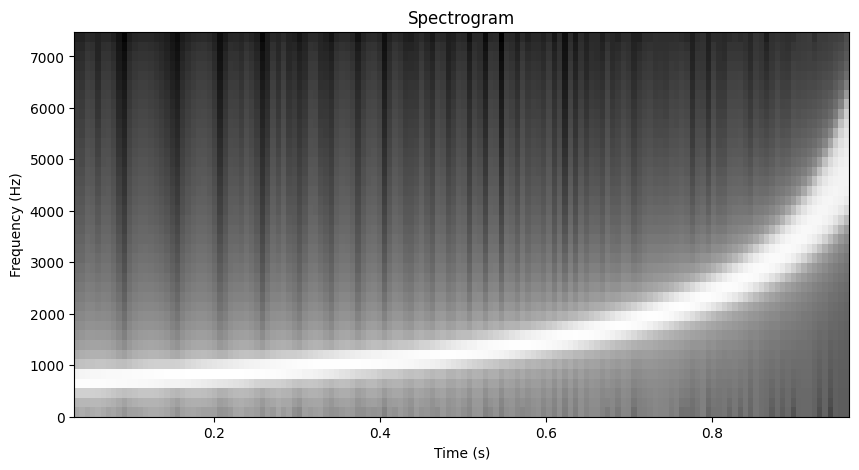

In [32]:
plot_spectrogram(x, sr=sr, window='hann', window_length=n_fft, overlap=90, cmap='grey', freq_scale="mel", n_bands=40)

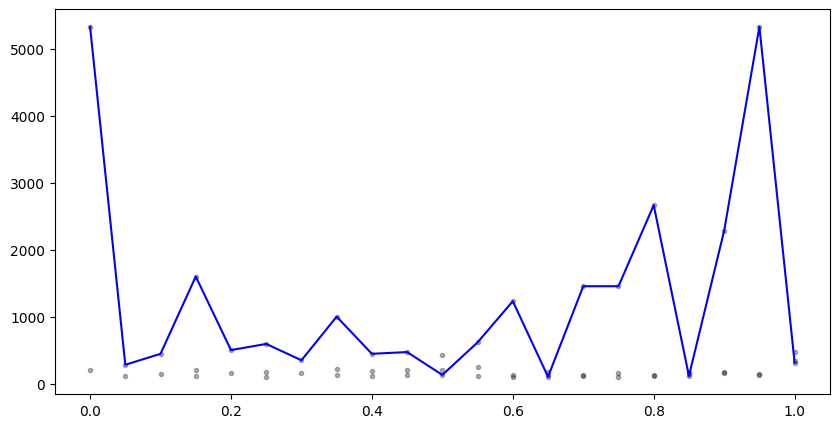

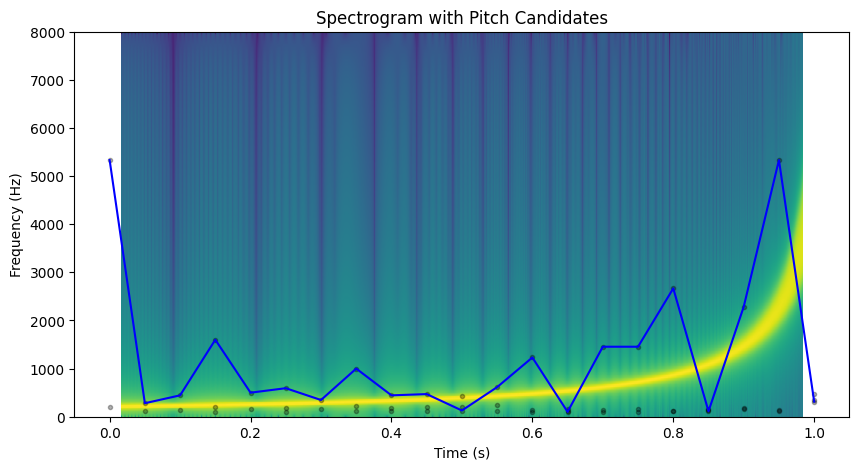

[107.38255034 108.84353741 109.5890411  110.34482759 111.88811189
 112.67605634 114.28571429 115.10791367 116.78832117 117.64705882
 119.40298507 120.30075188 121.21212121 123.07692308 124.03100775
 125.         126.98412698 128.         129.03225806 131.14754098
 132.23140496 133.33333333 134.45378151 136.75213675 137.93103448
 139.13043478 140.35087719  94.67455621  95.80838323  97.56097561
  98.7654321  100.         101.91082803 103.22580645 104.5751634
 105.9602649  108.10810811 109.5890411  111.11111111 113.4751773
 115.10791367 116.78832117 119.40298507 121.21212121 123.07692308
 125.98425197 128.         130.08130081 133.33333333 135.59322034
 137.93103448 141.59292035 144.14414414 146.78899083 158.41584158
 158.41584158 158.41584158 120.30075188 123.07692308 125.98425197
 129.03225806 133.33333333 136.75213675 158.41584158 158.41584158
 158.41584158 158.41584158 158.41584158 158.41584158 158.41584158
 158.41584158 158.41584158 158.41584158 158.41584158 158.41584158
 158.4158415

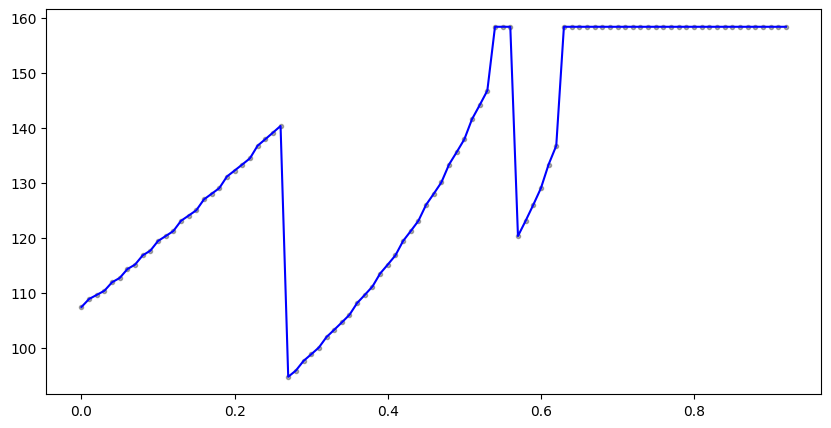

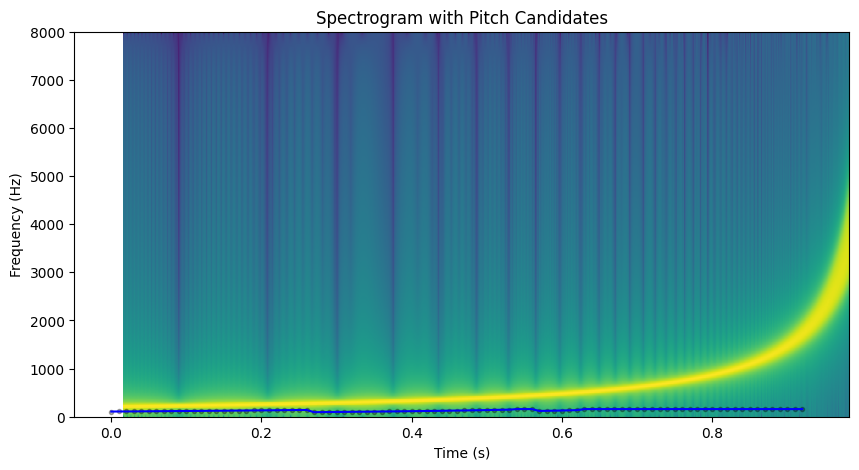

In [33]:
from biosonic.plot import plot_pitch_candidates, plot_pitch_on_spectrogram
from biosonic.compute.pitch import boersma, yin

# praat autocorrelation pitch tracking
time_points, candidates = boersma(x, sr, min_pitch=100, max_pitch=6000, voicing_thresh=.6, timestep=0.05)
Sx, t, f = spectrogram(x, sr=sr, window='hann', window_length=n_fft, overlap=95)
plot_pitch_candidates(time_points, candidates)
plot_pitch_on_spectrogram(x, sr, time_points, candidates, window_length=n_fft, overlap=95, flim=(0,10000))

# yin method
pitch_points = yin(x, sr, n_fft, 0.01, (100, 8000))
print(pitch_points)
time_points = np.arange(len(pitch_points)) * 0.01
plot_pitch_candidates(time_points, pitch_points)
# Plot
plot_pitch_on_spectrogram(x, sr, time_points, pitch_points, window_length=n_fft, overlap=95, flim=(0,10000))

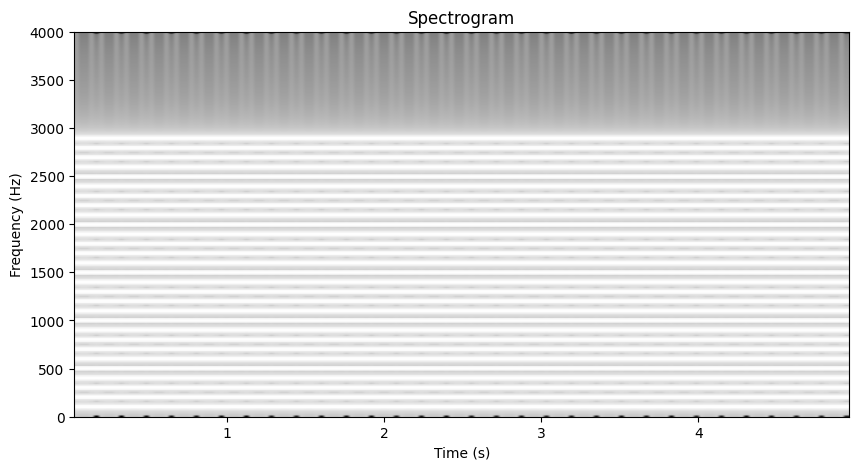

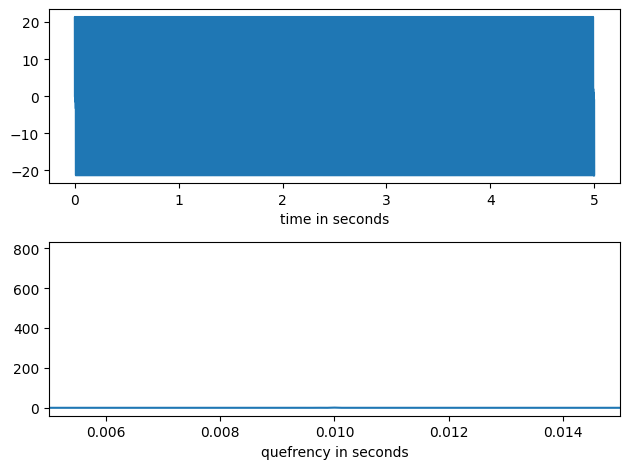

In [34]:
duration = 5.0
sr = 8000.0
samples = int(sr*duration)
t = np.arange(samples) / sr
fundamental = 100.0
harmonics = np.arange(1, 30) * fundamental
data = np.sin(2.0*np.pi*harmonics[:,None]*t).sum(axis=0)

Sx, t, f = spectrogram(data, sr)
plot_spectrogram(data, sr, cmap='grey', window_length=512)
plot_cepstrum(data, sr)

In [35]:
# from biosonic.handle import batch_normalize_wav_files

# batch_normalize_wav_files("/Users/lenagies/Desktop/Master/Nebenjob/biosonic/testfiles", 44100, 1, "float32")

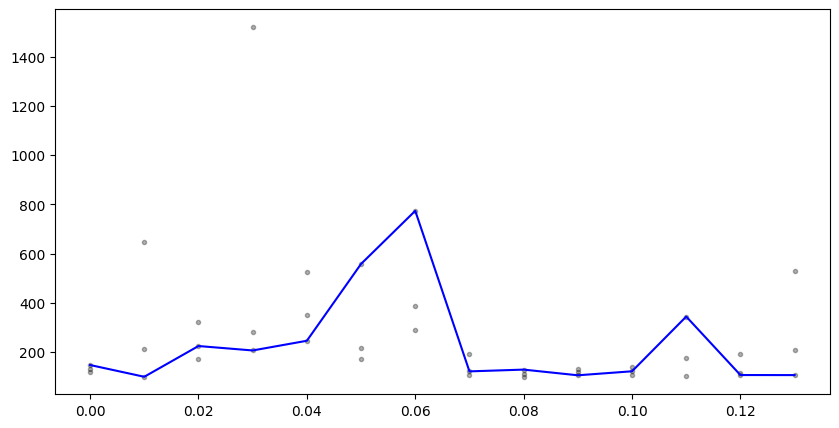

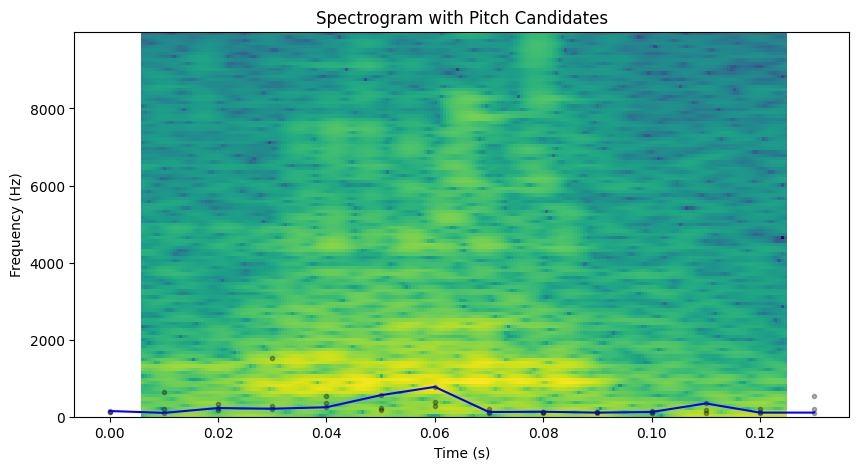

[436.63366337 436.63366337 158.06451613 156.93950178  27.37430168
  33.38380015 102.08333333 116.66666667 436.63366337 436.63366337]


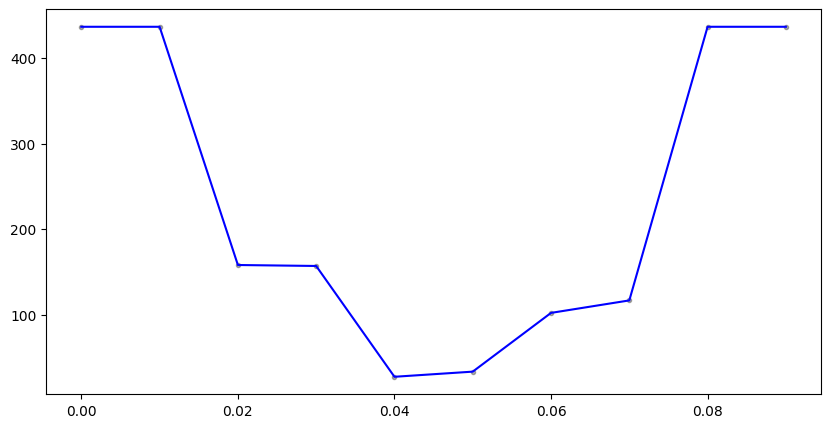

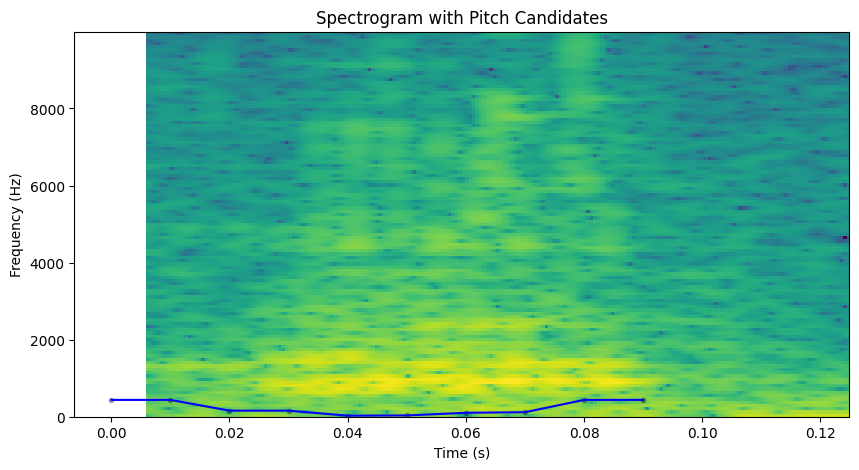

In [36]:
# Run pitch tracking
time_points, candidates = boersma(signal_.data, signal_.sr, min_pitch=100, max_pitch=2000)
Sx, t, f = spectrogram(signal_.data, sr=signal_.sr, window='hann', window_length=n_fft, overlap=95)
#plot_spectrogram(Sx, t, f, cmap='grey')

# Plot
plot_pitch_candidates(time_points, candidates)
plot_pitch_on_spectrogram(signal_.data, signal_.sr, time_points, candidates, window_length=n_fft, overlap=95, flim=(0,10000))

# yin method

pitch_points = yin(signal_.data, signal_.sr, n_fft, 0.01, (100, 2000))
print(pitch_points)
time_points = np.arange(len(pitch_points)) * 0.01
plot_pitch_candidates(time_points, pitch_points)
# Plot
plot_pitch_on_spectrogram(signal_.data, signal_.sr, time_points, pitch_points, window_length=n_fft, overlap=95, flim=(0,10000))

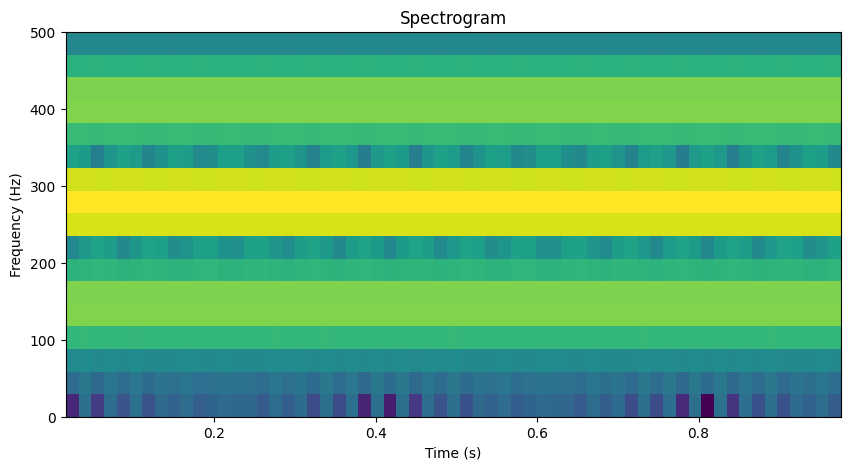

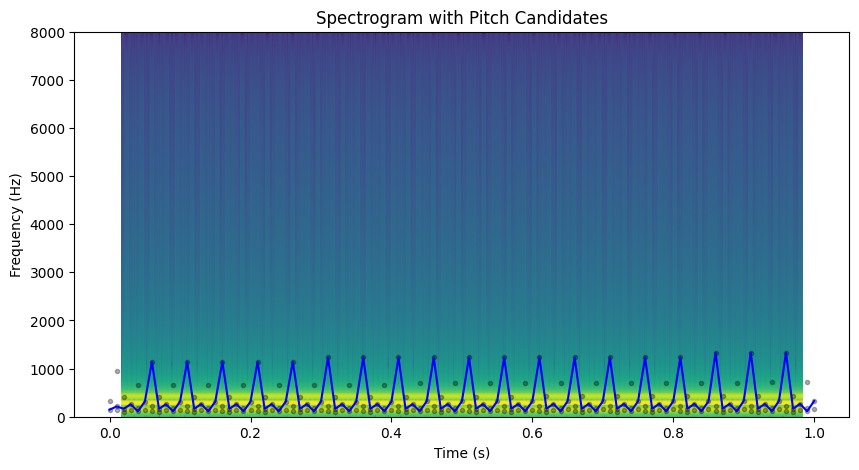

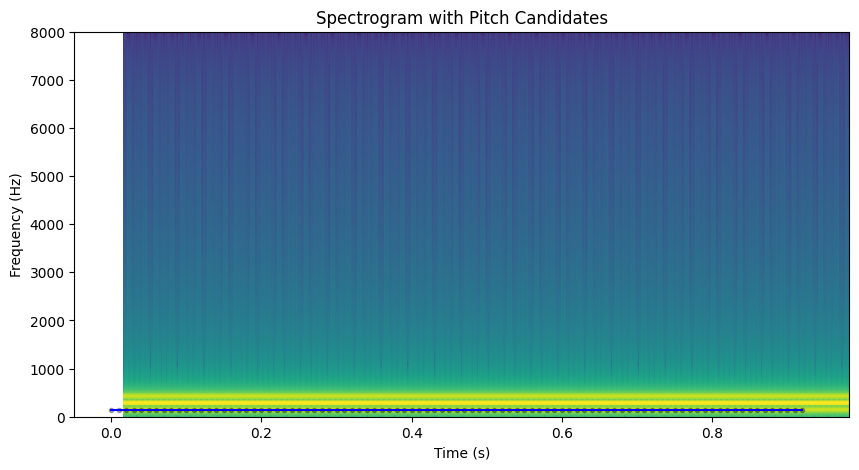

In [37]:
from biosonic.synthesize import amplitude_modulated

sr = 16000
time_points = np.linspace(0, 1, sr)
x = amplitude_modulated(time_points, 140, 280)
plot_spectrogram(x, sr, flim=(0, 500))

times, candidates = boersma(x, sr, min_pitch=100, max_pitch=2000)
plot_pitch_on_spectrogram(x, sr, times, candidates, window_length=n_fft, overlap=95, flim=(0,10000))

pitch_points = yin(x, sr, n_fft, 0.01, (100, 2000))
time_points = np.arange(len(pitch_points)) * 0.01
plot_pitch_on_spectrogram(x, sr, time_points, pitch_points, window_length=n_fft, overlap=95, flim=(0,10000))


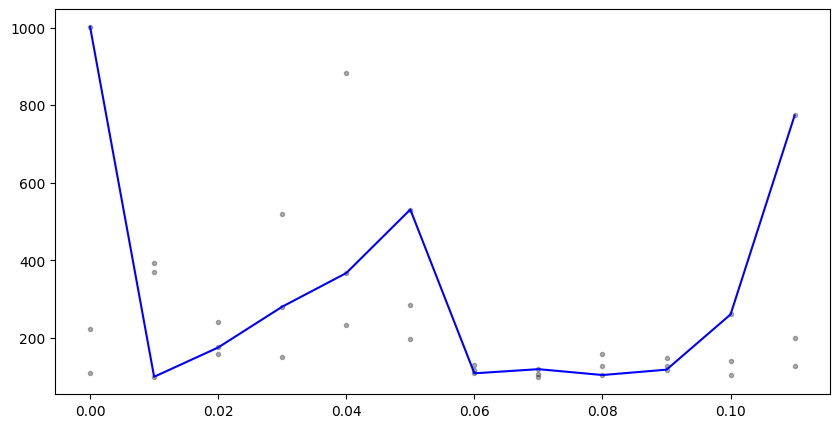

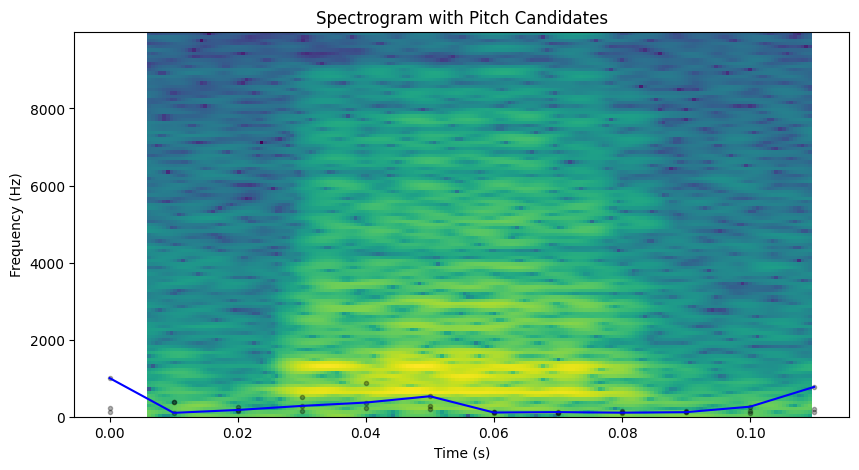

[436.63366337 324.26470588 321.89781022  69.77848101 209.00473934
 207.04225352 312.76595745 186.86440678 436.63366337]


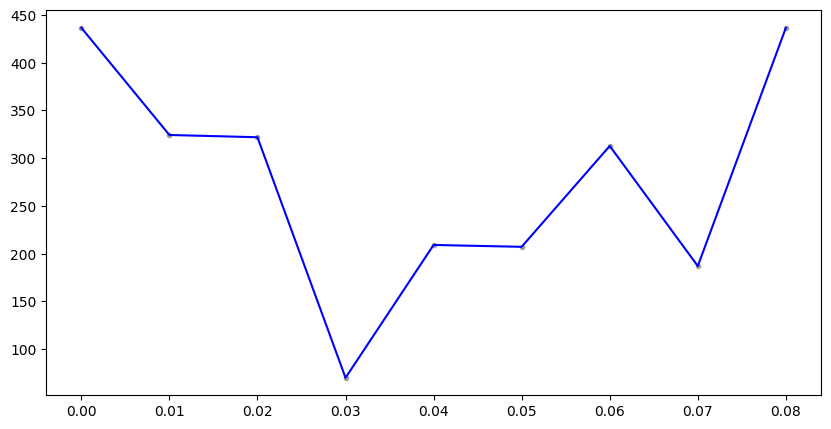

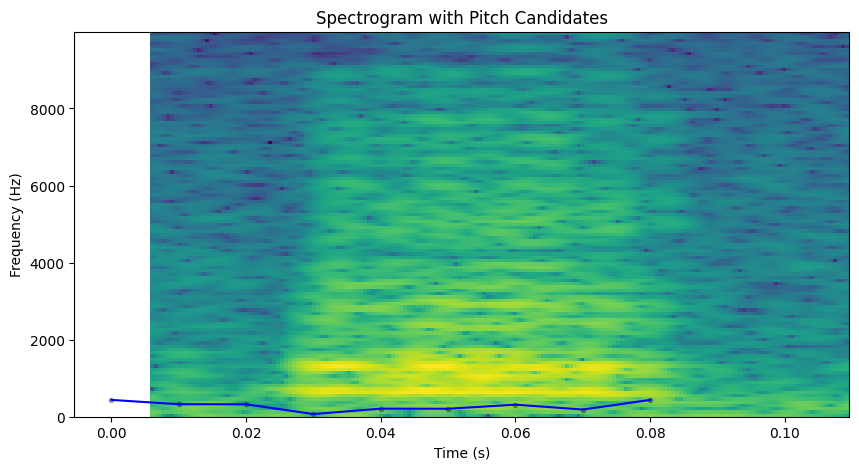

In [38]:
signal_ = read_wav("/Users/lenagies/Desktop/Master/Thesis/geese/data/GT00742_04_Pistazie_contact.wav")
# Run pitch tracking
time_points, candidates = boersma(signal_.data, signal_.sr, min_pitch=100, max_pitch=2000)
Sx, t, f = spectrogram(signal_.data, sr=signal_.sr, window='hann', window_length=n_fft, overlap=95)
#plot_spectrogram(Sx, t, f, cmap='grey')

# Plot
plot_pitch_candidates(time_points, candidates)
plot_pitch_on_spectrogram(signal_.data, signal_.sr, time_points, candidates, window_length=n_fft, overlap=95, flim=(0,10000))

# yin method

pitch_points = yin(signal_.data, signal_.sr, n_fft, 0.01, (100, 2000))
print(pitch_points)
time_points = np.arange(len(pitch_points)) * 0.01
plot_pitch_candidates(time_points, pitch_points)
# Plot
plot_pitch_on_spectrogram(signal_.data, signal_.sr, time_points, pitch_points, window_length=n_fft, overlap=95, flim=(0,10000))

In [39]:
plt.close()